In [2]:
import pandas as pd

## Impressões iniciais

Nesta etapa irei observar os dados de forma superficial para entender como estão
estruturados e quais informações estão disponíveis.

In [3]:
# importando os dados
dados = pd.read_csv('../data/raw/customer_booking.csv', encoding='latin-1')

In [4]:
# Checando como os dados estão
dados.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [6]:
# Verificando o tamanho do dataset
dados.shape

(50000, 14)

In [5]:
# Verificando a info sobre os dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
# Verificando se há valores duplicados
dados.drop_duplicates().shape

(49281, 14)

## Considerações a partir da análise inicial

A partir das informações iniciais, podemos entender que temos um dataset com 50 
mil registros e 14 colunas, onde tais registros não estão atribuídos a um 
usuário em específico. Devido a essa condição, podemos observar dados duplicados.

Além disso, podemos perceber que o tipo de dado da maior parte das colunas está 
coerente com o seu conteúdo, com exceção das colunas **wants_extra_baggage**, 
**wants_preferred_seat** e **wants_in_flight_meals**, que são colunas 
categóricas que foram previamente codificadas. 

Por último, também é possível perceber que não existem valores ausentes.

O nosso target está na coluna **booking complete**.

## Aplicando correções nos tipos de dados

In [62]:
# Alterando o tipo de dado da coluna 'wants_extra_baggage'
dados['wants_extra_baggage'] = dados['wants_extra_baggage'].astype('object')

In [63]:
# Alterando o tipo de dado da coluna 'wants_preferred_seat'
dados['wants_preferred_seat'] = dados['wants_preferred_seat'].astype('object')

In [64]:
# Alterando o tipo de dado da coluna 'wants_in_flight_meals'
dados['wants_in_flight_meals'] = dados['wants_in_flight_meals'].astype('object')

## Explorando as variáveis categóricas
Nesta etapa, irei verificar se existem valores raros em cada coluna. Caso 
existam, será necessário uni-los em uma única categoria, pois valores raros
podem compremeter o treinamento do modelo.

In [65]:
# Obtendo as colunas categóricas
cat_cols = dados.select_dtypes(include='object').columns.tolist()

In [66]:
# Verificando as colunas categóricas
dados.loc[:, cat_cols].head()

,sales_channel,trip_type,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand,1,0,0
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand,0,0,0
2,Internet,RoundTrip,Wed,AKLDEL,India,1,1,0
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand,0,0,1
4,Internet,RoundTrip,Wed,AKLDEL,India,1,0,1


In [14]:
# Verificando se existem registros raros na coluna 'sales_channel'
dados['sales_channel'].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [15]:
# Verificando se existem registros raros na coluna 'trip_type'
dados['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [16]:
# Verificando se existem registros raros na coluna 'flight_day'
dados['flight_day'].value_counts()


flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64

In [18]:
# Verificando se existem registros raros na coluna 'route'
dados['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
AKLHGH       1
MELVTE       1
MELWUH       1
URTXIY       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [20]:
# Verificando se existem registros raros na coluna 'booking_origin'
dados['booking_origin'].value_counts()

booking_origin
Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
               ...  
Estonia            1
Afghanistan        1
Czechia            1
Malta              1
Vanuatu            1
Name: count, Length: 104, dtype: int64

In [68]:
# Verificando se existem registros raros na coluna 'wants_extra_baggage'
dados['wants_extra_baggage'].value_counts()

wants_extra_baggage
1    33439
0    16561
Name: count, dtype: int64

In [70]:
# Verificando se existem registros raros na coluna 'wants_preferred_seat'
dados['wants_preferred_seat'].value_counts()

wants_preferred_seat
0    35152
1    14848
Name: count, dtype: int64

In [71]:
# Verificando se existem registros raros na coluna 'wants_in_flight_meals'
dados['wants_in_flight_meals'].value_counts()

wants_in_flight_meals
0    28643
1    21357
Name: count, dtype: int64

## Considerações a partir da análise das variáveis categóricas
A partir das 6 colunas categóricas, podemos observar que existem valores raros
em duas delas: **route** e **booking_origin**. Portanto, irei agrupar os valores
raros em uma nova categoria. Tais categorias serão agrupadas em uma única de nome
**'others'**.

## Corrigindo as variáveis categóricas que apresentaram problemas
Nesta fase, os dados com menos de 4 registros serão agrupados em uma nova 
categoria.

### Booking origin

In [50]:
# Buscando os registros que atendem ao critério de raridade
country_booking_less_than_four = dados['booking_origin'].value_counts() < 4

In [51]:
# Salvando em uma lista os paises que atendem ao critério de raridade
countries = dados['booking_origin'].value_counts()[country_booking_less_than_four].index.to_list()

In [52]:
# Criando função para substituir os registros raros por 'other'
func_rare_registry = lambda country: 'other' if country in countries else country

In [53]:
# Aplicando a função
dados['booking_origin'] = dados['booking_origin'].apply(func_rare_registry)

### Route

In [55]:
# Buscando os registros que atendem ao critério de raridade
route_less_than_four = dados['route'].value_counts() < 4

In [56]:
# Salvando em uma lista os paises que atendem ao critério de raridade
routes = dados['route'].value_counts()[route_less_than_four].index.to_list()

In [57]:
# Criando função para substituir os registros raros por 'other'
func_rare_registry = lambda route: 'other' if route in routes else route

In [58]:
# Aplicando a função
dados['route'] = dados['route'].apply(func_rare_registry)

## Explorando as variáveis numéricas
Na segunda parte, irei observar as variáveis numéricas para entender a 
variabilidade dos dados e se existem outliers.


In [72]:
# Obtendo as colunas numéricas
num_cols = dados.select_dtypes(['int', 'float']).columns.tolist()

In [73]:
# Verificando os dados numéricos
dados.loc[:, num_cols].head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,booking_complete
0,2,262,19,7,5.52,0
1,1,112,20,3,5.52,0
2,2,243,22,17,5.52,0
3,1,96,31,4,5.52,0
4,2,68,22,15,5.52,0


<Axes: >

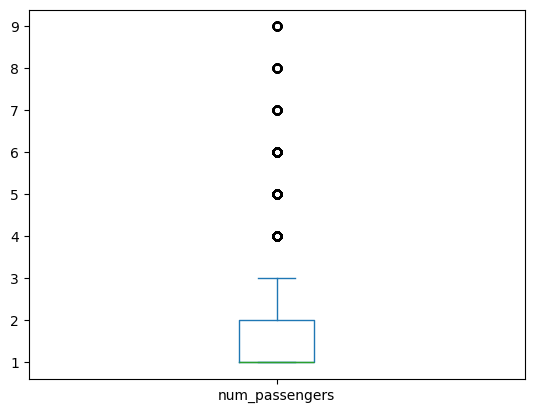

In [76]:
# Verificando a distribuição dos dados da coluna 'num_passengers'
dados['num_passengers'].plot(kind='box')

<Axes: >

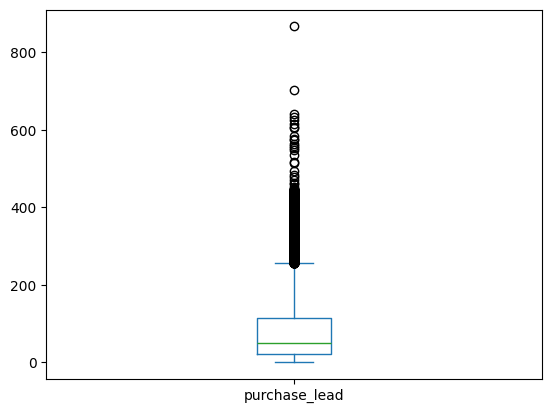

In [78]:
# Verificando a distribuição dos dados da coluna 'purchase_lead'
dados['purchase_lead'].plot(kind='box')

<Axes: >

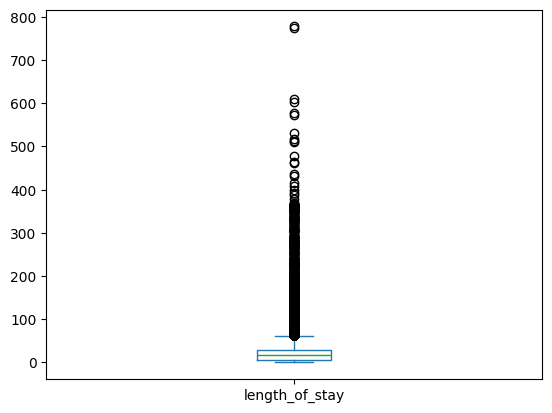

In [80]:
# Verificando a distribuição dos dados da coluna 'length_of_stay'
dados['length_of_stay'].plot(kind='box')

<Axes: >

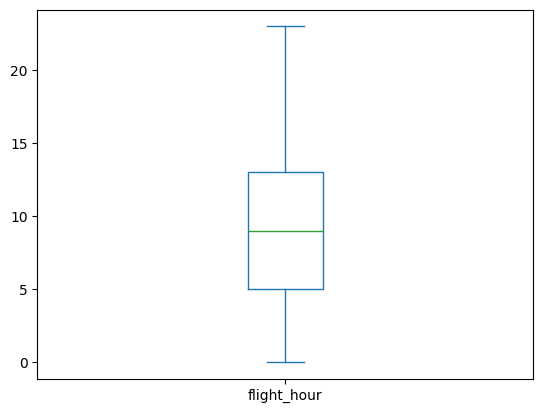

In [81]:
# Verificando a distribuição dos dados da coluna 'flight_hour'
dados['flight_hour'].plot(kind='box')

<Axes: >

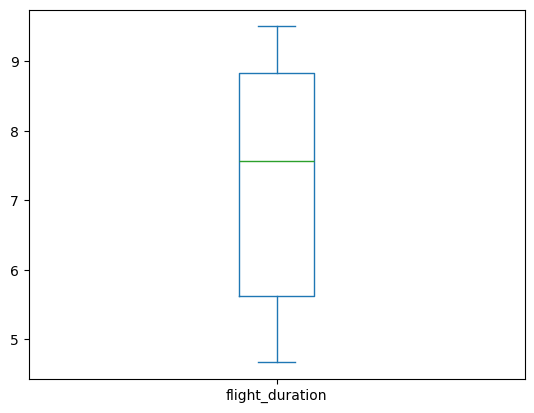

In [82]:
# Verificando a distribuição dos dados da coluna 'flight_duration'
dados['flight_duration'].plot(kind='box')

## Considerações a partir da análise das variáveis numéricas
A partir das colunas examinadas, podemos observar que existem outliers em três
delas. Entretanto, tais outliers aparentam ser naturais, e não provenientes de
erros de digitação ou de coleta de dados. Portanto, não serão tratados.

Além disso, os dados apresentam uma variabilidade considerável, fazendo com
não seja necessário realizar nenhum tipo de exclusão de coluna.



## Explorando o target
E por último, o target será analisado para verificar se há desbalanceamento.

In [87]:
dados['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

## Considerações a partir da análise do target

A partir da análise do target, podemos observar que o dataset está desbalanceado.